In [ ]:
### Dependencies instantiation ###

# Only run this cell once, if you haven't run it yet
# This ensures that you have all the necessary dependencies installed

using Pkg
Pkg.activate("../")
Pkg.instantiate()

In [1]:
### Imports ###

include("../src/QuantumPrimer.jl")
using .QuantumPrimer
using Yao
using YaoPlots
using Graphs
using GraphRecipes
using Plots
default(lw=2, ms=5, palette=:Set2_8)
using LinearAlgebra
using Random
using Optimisers
using Statistics

#### Graph analysis

In [62]:
n = 6

G_test = create_random_signed_graph(n)
# G_test = classify_state_frustration_number(n, 1, 1)
# G_test = SignedGraph([[1], [2], [3], [1, 2], [2, 3], [1, 3]], [0, 0, 0, 1, 1, 1])
# G_test = SignedGraph([[1], [2], [3], [1, 2], [2, 3], [1, 3]], [0, 0, 0, 1, 1, -1])
# G_test = SignedGraph([[1], [2], [3], [1, 2], [2, 3], [1, 3]], [0, 0, 0, 1, -1, -1])
# G_test = SignedGraph([[1], [2], [3], [1, 2], [2, 3], [1, 3]], [0, 0, 0, -1, -1, -1])

# G_test = SignedGraph([[1], [2], [3], [4], [1, 2], [1, 3], [2, 3], [1, 4]], [0, 0, 0, 0, -1, -1, -1, -1])
# G_test = SignedGraph([[1], [2], [3], [4], [1, 2], [2, 3], [3, 4], [1, 4]], [0, 0, 0, 0, 1, 1, 1, 1])
# G_test = SignedGraph([[1], [2], [3], [4], [1, 2], [1, 3], [1, 4], [2, 4], [3, 4]], [0, 0, 0, 0, 1, 1, 1, 1, 1])
# G_test = SignedGraph([[1], [2], [3], [4], [1, 2], [1, 3], [2, 3], [2, 4], [3, 4]], [0, 0, 0, 0, -1, -1, -1, -1, -1])

# The following signed graph has 30 unbalanced cycles that can be balanced with 3 sign changes (frustration number = 3).
# The balanced version is the next signed graph.
# G_test = SignedGraph([[1], [2], [3], [4], [5], [6], [1, 2], [1, 5], [1, 6], [2, 3], [2, 4], [2, 5], [2, 6], [3, 4], [3, 5], [3, 6], [4, 6], [5, 6]], [0, 0, 0, 0, 0, 0, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1])
# G_test = SignedGraph([[1], [2], [3], [4], [5], [6], [1, 2], [1, 5], [1, 6], [2, 3], [2, 4], [2, 5], [2, 6], [3, 4], [3, 5], [3, 6], [4, 6], [5, 6]], [0, 0, 0, 0, 0, 0, 1, -1, 1, -1, -1, -1, 1, 1, 1, -1, -1, -1])

println("##### G info #####")
println("Graph: ", G_test.l)
println("Signs: ", G_test.s)
println("$(length(find_cycles(G_test))) Cycles with signs $(evaluate_cycles_signs(G_test)): \n", find_cycles(G_test))
println("Number of unbalanced cycles: ", count_unbalanced_cycles(G_test))
println("Frustration number and sign change vector: ", find_frustration_index(G_test))
println("---------------------------------")
println("##### G spectrum info #####")
println("Number of positive edges: ", count(x -> x == 1, G_test.s))
# println("Number of negative eigenvalues: ", find_negative_eigs(G_test))
println("Degeneracy of the ground state: ", find_degeneracy_gs(G_test))
eigs_test = eigvals(create_hamiltonian_matrix(create_interaction_matrix(G_test)))
println("Spectrum: ", eigs_test)
println("---------------------------------")
println("##### L(G) spectrum info #####")
G_test_L = create_line_graph(G_test)
println("Number of positive edges: ", count(x -> x == 1, G_test_L.s))
# println("Number of negative eigenvalues: ", find_negative_eigs(G_test_L))
println("Degeneracy of the ground state: ", find_degeneracy_gs(G_test_L))
eigs_test_L = eigvals(create_hamiltonian_matrix(create_interaction_matrix(G_test_L)))
println("Spectrum: ", eigs_test_L)

println("\n")
println("##### G_balanced info #####")
G_balanced = balance_signed_graph(G_test)
# G_balanced = reduce_frustration_signed_graph(G_test, 1)
println("Graph: ", G_balanced.l)
println("Signs: ", G_balanced.s)
println("$(length(find_cycles(G_test))) Cycles with signs $(evaluate_cycles_signs(G_test)): \n", find_cycles(G_balanced))
println("Number of unbalanced cycles: ", count_unbalanced_cycles(G_balanced))
println("Frustration number and sign change vector: ", find_frustration_index(G_balanced))
println("---------------------------------")
println("##### G spectrum info #####")
println("Number of positive edges: ", count(x -> x == 1, G_balanced.s))
# println("Number of negative eigenvalues: ", find_negative_eigs(G_balanced))
println("Degeneracy of the ground state: ", find_degeneracy_gs(G_balanced))
eigs_balanced = eigvals(create_hamiltonian_matrix(create_interaction_matrix(G_balanced)))
println("Spectrum: ", eigs_test)
println("---------------------------------")
println("##### L(G) spectrum info #####")
G_balanced_L = create_line_graph(G_balanced)
println("Number of positive edges: ", count(x -> x == 1, G_balanced_L.s))
# println("Number of negative eigenvalues: ", find_negative_eigs(G_balanced_L))
println("Degeneracy of the ground state: ", find_degeneracy_gs(G_balanced_L))
eigs_balanced_L = eigvals(create_hamiltonian_matrix(create_interaction_matrix(G_balanced_L)))
println("Spectrum: ", eigs_balanced_L)

# println("\n")
# println("G and G_balanced have the same spectrum: ", eigs_test == eigs_balanced)
# println("L(G) and L(G_balanced) have the same spectrum: ", eigs_test_L == eigs_balanced_L)

println("\n")
# println("Skewness ratio between eigs_G and eigs_G_L: ", skewness(eigs_test) / skewness(eigs_test_L))
# println("Skewness ratio between eigs_Gbal and eigs_Gbal_L: ", skewness(eigs_balanced) / skewness(eigs_balanced_L))
println("Difference of frustration indices: ", abs(find_frustration_index(G_test)[1] - find_frustration_index(G_balanced)[1]))
println("Difference of skewness ratios: ", skewness(eigs_balanced) / skewness(eigs_balanced_L) - skewness(eigs_test) / skewness(eigs_balanced_L))

##########################
##########################

Plots.plot()
p3 = Plots.histogram!(eigs_test, bins=20, label="G spectrum")
Plots.plot()
p4 = Plots.histogram!(eigs_test_L, bins=20, label="L(G) spectrum")

##########################
##########################

Plots.plot()
p7 = Plots.histogram!(eigs_balanced, bins=20, label="G_balanced spectrum")
Plots.plot()
p8 = Plots.histogram!(eigs_balanced_L, bins=20, label="L(G_balanced) spectrum")

##########################
##########################

simple_graph, dataset, edgecolor_mat = plot_signed_graph(G_test)
p1 = graphplot(simple_graph, 
          x=[i[1] for i in dataset], 
          y=[i[2] for i in dataset], 
          names=1:nv(simple_graph), 
          nodeshape=:circle,
          nodesize=0.18,
          nodecolor=:white,
          fontsize=8,
          curves=false,
          linewidth=2,
          edgecolor=edgecolor_mat)

##########################
##########################

simple_graph, dataset, edgecolor_mat = plot_signed_graph(create_line_graph(G_test))
p2 = graphplot(simple_graph, 
          x=[i[1] for i in dataset], 
          y=[i[2] for i in dataset], 
          names=1:nv(simple_graph), 
          nodeshape=:circle,
          nodesize=0.18,
          nodecolor=:white,
          fontsize=8,
          curves=false,
          linewidth=2,
          edgecolor=edgecolor_mat)

##########################
##########################

simple_graph, dataset, edgecolor_mat = plot_signed_graph(G_balanced)
p5 = graphplot(simple_graph, 
          x=[i[1] for i in dataset], 
          y=[i[2] for i in dataset], 
          names=1:nv(simple_graph), 
          nodeshape=:circle,
          nodesize=0.2,
          nodecolor=:white,
          fontsize=8,
          curves=false,
          linewidth=2,
          edgecolor=edgecolor_mat)

##########################
##########################

simple_graph, dataset, edgecolor_mat = plot_signed_graph(create_line_graph(G_balanced))
p6 = graphplot(simple_graph, 
          x=[i[1] for i in dataset], 
          y=[i[2] for i in dataset], 
          names=1:nv(simple_graph), 
          nodeshape=:circle,
          nodesize=0.2,
          nodecolor=:white,
          fontsize=8,
          curves=false,
          linewidth=2,
          edgecolor=edgecolor_mat)

##########################
##########################

Plots.plot(p1, p2, p3, p4, p5, p6, p7, p8, layout=(2, 4), size=(1100, 500))

##### G info #####
Graph: [[1], [2], [3], [4], [5], [6], [1, 2], [1, 4], [1, 5], [1, 6], [2, 4], [2, 5], [3, 4], [3, 5], [3, 6], [4, 5], [4, 6], [5, 6]]
Signs: [0, 0, 0, 0, 0, 0, -1, -1, 1, 1, 1, -1, -1, -1, 1, -1, -1, -1]
54 Cycles with signs [1, 1, -1, -1, 1, 1, -1, -1, 1, -1, -1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, 1, -1, -1, 1, -1, -1, -1, -1, -1, 1, -1, 1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1]: 
[([1, 2, 5], [[1, 2], [1, 5], [2, 5]]), ([1, 3, 4, 5, 6], [[1, 4], [1, 6], [3, 4], [3, 5], [5, 6]]), ([1, 2, 3, 4, 5, 6], [[1, 2], [1, 6], [2, 5], [3, 4], [3, 5], [4, 6]]), ([1, 3, 4, 5, 6], [[1, 4], [1, 5], [3, 5], [3, 6], [4, 6]]), ([3, 4, 5, 6], [[3, 4], [3, 5], [4, 6], [5, 6]]), ([2, 4, 5], [[2, 4], [2, 5], [4, 5]]), ([3, 4, 5, 6], [[3, 5], [3, 6], [4, 5], [4, 6]]), ([1, 2, 5, 6], [[1, 2], [1, 6], [2, 5], [5, 6]]), ([1, 2, 4, 5, 6], [[1, 2], [1, 6], [2, 5], [4, 5], [4, 6]]), ([1, 3, 4, 5, 6], [[1, 5], [1, 6], [3, 4], [3, 5], [4, 6]]), ([1, 2, 4, 5, 

#### Datasets

In [17]:
#############################
########### QNN #############
#############################

seed = 1234 # set seed for reproducibility
Random.seed!(seed)
 
n_graph = 3 # number of vertices
n = nextpow(2, binomial(n_graph, 2)) # smallest power of 2 that is larger than the number of possible edges in the line graph
n_samples = 20 # number of samples per class
β = 100.
threshold = 0

graphs1 = []
states1 = ArrayReg{}[]
while length(states1) < n_samples*2
    try
        # push!(states1, create_purified_state(τ0, classify_state_negative_spectrum(n_graph, 1)))
        # push!(states1, create_purified_state(τ0, classify_state_degeneracy(n_graph, 1)))
        ####
        tmp_graph = classify_state_frustration_index(n_graph, threshold, 1)
        if all([tmp_graph != ele for ele in graphs1])
            push!(states1, create_purified_state(β, tmp_graph))
        end
    catch
        continue
    end
end

graphs2 = []
states2 = ArrayReg{}[]
while length(states2) < n_samples*2
    try
        # push!(states2, create_purified_state(τ0, classify_state_negative_spectrum(n_graph, -1)))
        # push!(states2, create_purified_state(τ0, classify_state_degeneracy(n_graph, -1)))
        ####
        tmp_graph = classify_state_frustration_index(n_graph, threshold, -1)
        if all([tmp_graph != ele for ele in graphs2])
            push!(states2, create_purified_state(β, tmp_graph))
        end
    catch
        continue
    end
end

if maximum([nactive(states1[i]) for i in 1:length(states1)]) > n || maximum([nactive(states2[i]) for i in 1:length(states2)]) > n
    error("Not enough qubits in the model, increase n.")
end

for i in 1:n_samples*2
    append_qubits!(states1[i], n - nactive(states1[i]))
    append_qubits!(states2[i], n - nactive(states2[i]))
end
 
# train
tr_states = vcat([states1[1:n_samples], states2[1:n_samples]]...)
tr_labels = vcat([repeat([1], n_samples), repeat([-1], n_samples)]...)
 
# test
te_states = vcat([states1[n_samples+1:n_samples*2], states2[n_samples+1:n_samples*2]]...)
te_labels = vcat([repeat([1], n_samples), repeat([-1], n_samples)]...)
 
# structures
d1 = Data(tr_states, tr_labels);
d2 = Data(te_states, te_labels);

In [19]:
#############################
########### QSNN ############
#############################

seed = 1234 # set seed for reproducibility
Random.seed!(seed)
 
n_graph = 3 # number of vertices
n = nextpow(2, binomial(n_graph, 2)) # smallest power of 2 that is larger than the number of possible edges in the line graph
n_samples = 20 # number of samples per class
β = 100. # inverse temperature to prepare the Gibbs state
threshold = 0 # threshold for the frustration index

graphs1 = []
states1 = ArrayReg{}[]
while length(states1) < n_samples*2
    try
        # push!(states1, create_purified_state(τ0, classify_state_negative_spectrum(n_graph, 1)))
        # push!(states1, create_purified_state(τ0, classify_state_degeneracy(n_graph, 1)))
        ####
        tmp_graph = classify_state_frustration_index(n_graph, threshold, 1)
        if all([tmp_graph != ele for ele in graphs1])
            push!(states1, create_purified_state(β, tmp_graph))
        end
    catch
        continue
    end
end

graphs2 = []
states2 = ArrayReg{}[]
while length(states2) < n_samples*2
    try
        # push!(states2, create_purified_state(τ0, classify_state_negative_spectrum(n_graph, -1)))
        # push!(states2, create_purified_state(τ0, classify_state_degeneracy(n_graph, -1)))
        ####
        tmp_graph = classify_state_frustration_index(n_graph, threshold, -1)
        if all([tmp_graph != ele for ele in graphs2])
            push!(states2, create_purified_state(β, tmp_graph))
        end
    catch
        continue
    end
end

if maximum([nactive(states1[i]) for i in 1:length(states1)]) > n || maximum([nactive(states2[i]) for i in 1:length(states2)]) > n
    error("Not enough qubits in the model, increase n.")
end

for i in 1:2*n_samples
    append_qubits!(states1[i], n - nactive(states1[i]))
    append_qubits!(states2[i], n - nactive(states2[i]))
end

psi1 = deepcopy(states1)
psi2 = deepcopy(states2)

states1 = Vector{NTuple{2, ArrayReg}}(undef, 2*n_samples)
states2 = Vector{NTuple{2, ArrayReg}}(undef, 2*n_samples)

for i in 1:n_samples
    states1[i] = (rand(psi1), rand(psi1)) # zero vs zero states
    states2[i] = (rand(psi1), rand(psi2)) # zero vs entangled states
    states1[n_samples+i] = (rand(psi2), rand(psi2)) # entangled vs entangled states
    states2[n_samples+i] = (rand(psi2), rand(psi1)) # entangled vs zero states
end

# train
tr_states = vcat([states1[1:n_samples], states2[1:n_samples]]...)
tr_labels = vcat([repeat([1], n_samples), repeat([-1], n_samples)]...)

# test
te_states = vcat([states1[n_samples+1:n_samples*2], states2[n_samples+1:n_samples*2]]...)
te_labels = vcat([repeat([1], n_samples), repeat([-1], n_samples)]...)

# structures
d1 = DataSiamese(tr_states, tr_labels);
d2 = DataSiamese(te_states, te_labels);

Dataset composed feeding information of the graph and its line graph, $(\rho_\beta^{\mathcal{G}}, \rho_\beta^{\mathcal{L}(\mathcal{G})})$

In [20]:
#############################
########### QSNN ############
#############################

# Thermal state of a graph and its line graph

seed = 1234 # set seed for reproducibility
Random.seed!(seed)
 
n_graph = 3 # number of vertices
n = nextpow(2, binomial(n_graph, 2)) # smallest power of 2 that is larger than the number of possible edges in the line graph
n_samples = 20 # number of samples per class
β = 100. # inverse temperature to prepare the Gibbs state
threshold = 0 # threshold for the frustration index

graphs1 = []
psi1 = ArrayReg{}[]
psi1_line = ArrayReg{}[]
while length(psi1) < n_samples*2
    try
        tmp_graph = classify_state_frustration_index(n_graph, threshold, 1)
        if all([tmp_graph != ele for ele in graphs1])
            psi1_tmp = create_purified_state(β, tmp_graph)
            psi1_line_tmp = create_purified_state(β, create_line_graph(tmp_graph))
            push!(psi1, psi1_tmp)
            push!(psi1_line, psi1_line_tmp)
        end
    catch
        continue
    end
end

graphs2 = []
psi2 = ArrayReg{}[]
psi2_line = ArrayReg{}[]
while length(psi2) < n_samples*2
    try
        tmp_graph = classify_state_frustration_index(n_graph, threshold, -1)
        if all([tmp_graph != ele for ele in graphs2])
            psi2_tmp = create_purified_state(β, tmp_graph)
            psi2_line_tmp = create_purified_state(β, create_line_graph(tmp_graph))
            push!(psi2, psi2_tmp)
            push!(psi2_line, psi2_line_tmp)
        end
    catch
        continue
    end
end

if maximum([nactive(psi1[i]) for i in 1:length(psi1)]) > n || maximum([nactive(psi2[i]) for i in 1:length(psi2)]) > n
    error("Not enough qubits in the model, increase n.")
end
if maximum([nactive(psi1_line[i]) for i in 1:length(psi1_line)]) > n || maximum([nactive(psi2_line[i]) for i in 1:length(psi2_line)]) > n
    error("Not enough qubits in the model, increase n.")
end

for i in 1:2*n_samples
    append_qubits!(psi1[i], n - nactive(psi1[i]))
    append_qubits!(psi2[i], n - nactive(psi2[i]))
    append_qubits!(psi1_line[i], n - nactive(psi1_line[i]))
    append_qubits!(psi2_line[i], n - nactive(psi2_line[i]))
end

states1 = Vector{NTuple{2, ArrayReg}}(undef, 2*n_samples)
states2 = Vector{NTuple{2, ArrayReg}}(undef, 2*n_samples)

random_sequence = randperm(2*n_samples)
for i in 1:n_samples*2
    idx = random_sequence[i]
    states1[idx] = (psi1[idx], psi1_line[idx]) # class A
    states2[idx] = (psi2[idx], psi2_line[idx]) # class B
end

# train
tr_states = vcat([states1[1:n_samples], states2[1:n_samples]]...)
tr_labels = vcat([repeat([1], n_samples), repeat([-1], n_samples)]...)

# test
te_states = vcat([states1[n_samples+1:n_samples*2], states2[n_samples+1:n_samples*2]]...)
te_labels = vcat([repeat([1], n_samples), repeat([-1], n_samples)]...)

# structures
d1 = DataSiamese(tr_states, tr_labels);
d2 = DataSiamese(te_states, te_labels);

#### Model parameters

In [ ]:
#############################
############ QNN ############
#############################

iters = 300 # number of iterations
lr = 0.05  # learning rate. Start with lr=0.1. Reduce to (e.g. lr=0.01) if optimisation is not smooth.
optim = ADAM(lr) # Descent(lr) # See https://fluxml.ai/Optimisers.jl/dev/api/#Optimisation-Rules for different optimisers.

##### Cost #####
cost_fun = circ_Z
activation = x -> sigmoid(10x) # default is identity
cost = CircuitCost(cost_fun, activation)
################

##### QCNN #####
# ansatz = circ_Ry_conv # circ_Ry_conv, circ_Ry_simple_conv, circ_SU4_conv
# circ = build_QCNN(n, ansatz=ansatz)
################

##### QNN #####
ansatz = circ_HEA
depth = ceil(Int, log2(n))
circ = build_QNN(n, depth, ansatz=ansatz)
###############

##### Model #####
model = GeneralModel(n=n, circ=circ, ansatz=ansatz)
# model = InvariantModel(n=n, circ=circ, ansatz=ansatz) # only valid for QCNN
#################

initialize_params(model);

YaoPlots.plot(circ)
# YaoPlots.plot(cost(n))

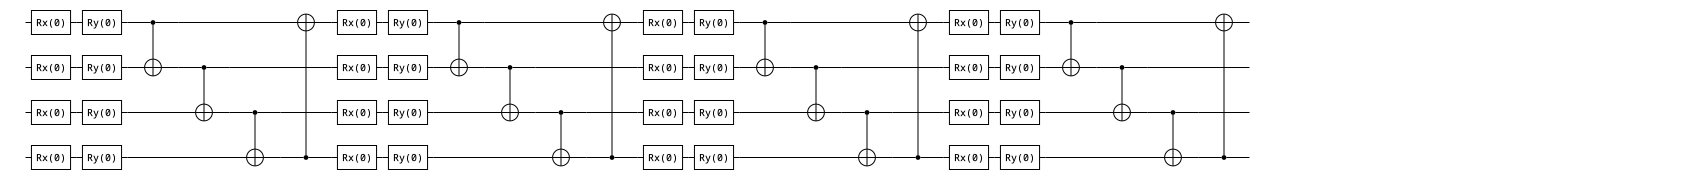

In [46]:
#############################
###### QSNN covariance ######
#############################

iters = 100 # number of iterations
lr = 0.2  # learning rate. Start with lr=0.1. Reduce to (e.g. lr=0.01) if optimisation is not smooth.
optim = ADAM(lr) # Descent(lr) # See https://fluxml.ai/Optimisers.jl/dev/api/#Optimisation-Rules for different optimisers.

##### Cost #####
# observables commute with SWAP
# intrinsically evaluating the quantity abs2 of the overlap
obs_A = chain(2n, put(i=>X) for i = 1:2n) # sum(chain(n, put(i=>X) for i = 1:n))
obs_B = chain(2n, put(i=>Z) for i = 1:2n) # sum(chain(n, put(i=>Z) for i = 1:n))
cost_fun = (output, state1, state2; kwargs...) -> covariance_siamese_commuting_obs(output, state1, state2, obs_A, obs_B; kwargs...)
activation = x -> sigmoid(x, 10, 0.5) # default is identity
cost = GeneralCost(cost_fun, activation)
################

##### QSCNN #####
# cost = circ_Z # NB: loss and gradients still need to be adjusted for conv siamese
# ansatz = circ_Ry_conv # circ_Ry_conv, circ_Ry_simple_conv, circ_SU4_conv
# circ = build_QCNN(n, ansatz=ansatz)
#################

##### QSNN #####
ansatz = circ_HEA
depth = 4 # ceil(Int, log2(n))
circ = build_QNN(n, depth, ansatz=ansatz)
################

##### Model #####
model = GeneralModel(n=n, circ=circ, ansatz=ansatz)
# model = InvariantModel(n=n, circ=circ, ansatz=ansatz) # only valid for QCNN
#################

initialize_params(model);

YaoPlots.plot(circ)
# YaoPlots.plot(cost(n))

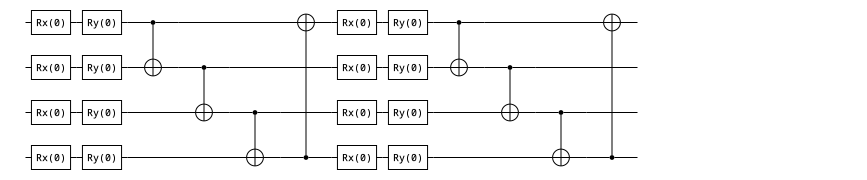

In [21]:
#############################
######### QSNN LCU ##########
#############################

iters = 100 # number of iterations
lr = 0.02  # learning rate. Start with lr=0.1. Reduce to (e.g. lr=0.01) if optimisation is not smooth.
optim = ADAM(lr) # Descent(lr) # See https://fluxml.ai/Optimisers.jl/dev/api/#Optimisation-Rules for different optimisers.

##### Cost #####
cost_fun = circ_swap_all
activation = x -> sigmoid(x, 10, 0.5) # default is identity
cost = CircuitCost(cost_fun, activation)
################

##### QCNN #####
# ansatz = circ_Ry_conv # circ_Ry_conv, circ_Ry_simple_conv, circ_SU4_conv
# circ1 = build_QCNN(n, ansatz=ansatz)
# circ2 = build_QCNN(n, ansatz=ansatz)
################

##### QNN #####
ansatz = circ_HEA
depth = 2 # ceil(Int, log2(n))
circ1 = build_QNN(n, depth, ansatz=ansatz)
circ2 = build_QNN(n, depth, ansatz=ansatz)
###############

##### Model #####
model1 = GeneralModel(n=n, circ=circ1, ansatz=ansatz)
model2 = GeneralModel(n=n, circ=circ2, ansatz=ansatz)
# # model1 = InvariantModel(n=n, circ=circ1, ansatz=ansatz) # only valid for QCNN
# # model2 = InvariantModel(n=n, circ=circ2, ansatz=ansatz)
#################

initialize_params(model1);
initialize_params(model2);

YaoPlots.plot(circ1)
# YaoPlots.plot(obs_A*obs_B)

#### Run

In [ ]:
#############################
############ QNN ############
#############################

model_results = train_test_model(d1, d2, model, cost, iters, optim; regularization=:nothing, verbose=true);
# model_results = train_test_model(d1, d2, model, cost, iters, optim; lambda=1e-2, regularization=:l1, verbose=true);
# model_results = train_test_model(d1, d2, model, cost, iters, optim; lambda=6e-4, regularization=:l2, verbose=true);

params, loss_track, tr_track, te_track, tr_preds, te_preds = model_results;

In [ ]:
#############################
###### QSNN covariance ######
#############################

model_results = train_test_model(d1, d2, model, cost, iters, optim; regularization=:nothing, verbose=true);
# model_results = train_test_model(d1, d2, model, cost, iters, optim; lambda=1e-2, regularization=:l1, verbose=true);
# model_results = train_test_model(d1, d2, model, cost, iters, optim; lambda=1e-5, regularization=:l2, verbose=true);

model_params, loss_track, tr_track, te_track, tr_preds, te_preds = model_results;

In [22]:
#############################
######### QSNN LCU ##########
#############################

models = (model1, model2)
model_results = train_test_model(d1, d2, models, cost, iters, optim; regularization=:nothing, verbose=true);
# model_results = train_test_model(d1, d2, models, cost, iters, optim; lambda=1e-4, regularization=:l1, verbose=true);
# model_results = train_test_model(d1, d2, models, cost, iters, optim; lambda=1e-4, regularization=:l2, verbose=true);

model1_params, model2_params, loss_track, tr_track, te_track, tr_preds, te_preds = model_results;

Initial: loss = 2.322453192886868, tr_acc = 0.375, te_acc = 0.4
Iteration 12: loss = 2.1618902291771103, tr_acc = 0.425, te_acc = 0.5
Iteration 24: loss = 1.9117433926495442, tr_acc = 0.425, te_acc = 0.35
Iteration 36: loss = 1.818341197053293, tr_acc = 0.525, te_acc = 0.5
Iteration 48: loss = 1.784215877533766, tr_acc = 0.55, te_acc = 0.6
Iteration 60: loss = 1.6623702107812228, tr_acc = 0.55, te_acc = 0.675
Iteration 72: loss = 1.6280032803542264, tr_acc = 0.6, te_acc = 0.625
Iteration 84: loss = 1.6893748810046727, tr_acc = 0.55, te_acc = 0.6
Iteration 96: loss = 1.9385825199194422, tr_acc = 0.425, te_acc = 0.35
Final: loss = 2.0300596646759357, tr_acc = 0.425, te_acc = 0.35


#### Plot

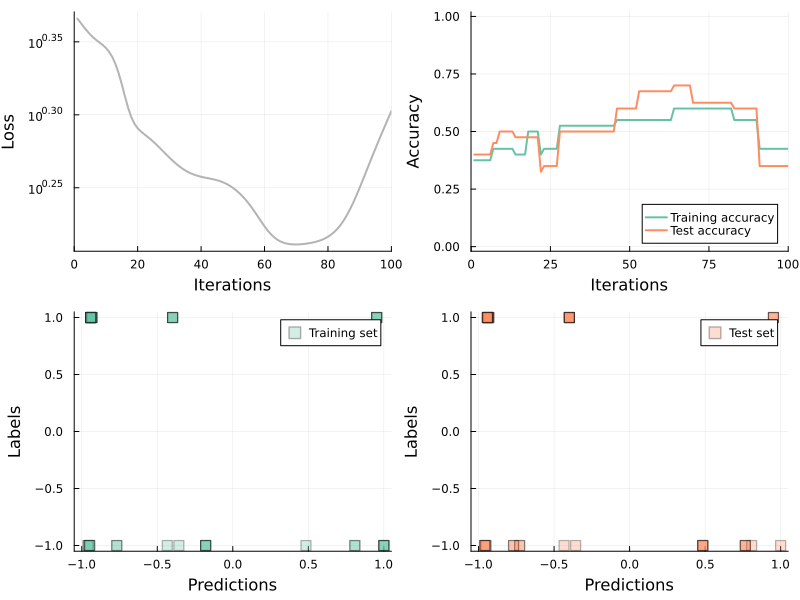

In [23]:
# Loss vs Interations
p1 = Plots.plot(xlim=(0, iters), xlabel="Iterations", ylabel="Loss")
# Plots.hline!([loss_track[1]], label=false, c=0, ylim=(0.9loss_track[1], 1.1loss_track[1]))
Plots.plot!(loss_track, yaxis=:log, label=false, c=0)

# Accuracy vs Interations
p2 = Plots.plot(xlim=(-0.05, iters), ylim=(-0.02, 1.02), xlabel="Iterations", ylabel="Accuracy", legend=:bottomright)
Plots.plot!(tr_track, label="Training accuracy", c=1)
Plots.plot!(te_track, label="Test accuracy", c=2)

# Training labels vs predictions
p3 = Plots.scatter(xlabel="Predictions", ylabel="Labels")
Plots.scatter!(tr_preds, tr_labels, ma=0.3, shape=:rect, label="Training set", c=1, xlim=(-1.05, 1.05), ylim=(-1.05, 1.05))

# Test labels vs predictions
p4 = Plots.scatter(xlabel="Predictions", ylabel="Labels")
Plots.scatter!(te_preds, te_labels, ma=0.3, shape=:rect, label="Test set", c=2, xlim=(-1.05, 1.05), ylim=(-1.05, 1.05))

Plots.plot(p1, p2, p3, p4, layout=(2, 2), size=(800, 600))